In [ ]:
!pip install textblob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy.stats import ttest_ind


In [4]:
# Data Collection
app_info_df = pd.read_csv(r"C:\Users\mainu\Downloads\task4apps.csv")
reviews_df = pd.read_csv(r"C:\Users\mainu\Downloads\task4user_reviews.csv")

# Data Cleaning and Preprocessing
app_info_df.drop_duplicates(inplace=True)
app_info_df.dropna(inplace=True)

# Assuming 'App' is a common column for merging
merged_df = pd.merge(app_info_df, reviews_df, on='App')


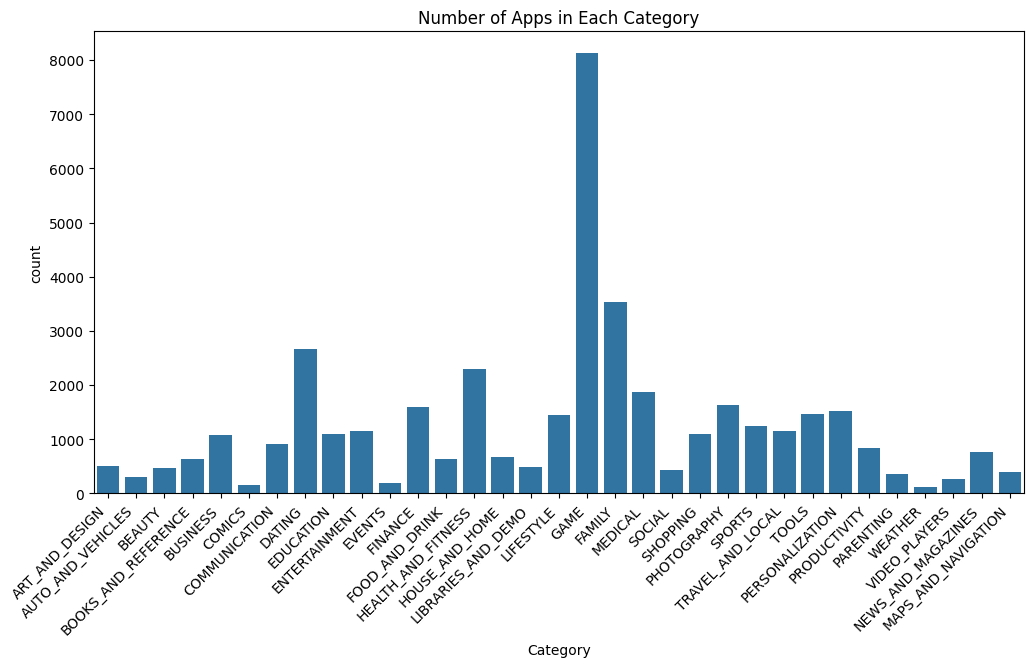

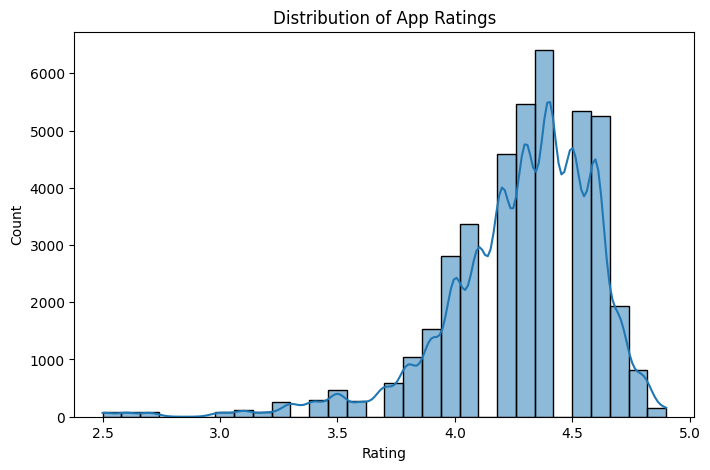

In [6]:
# EDA - Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=merged_df)
plt.title('Number of Apps in Each Category')
plt.xticks(rotation=45, ha='right')
plt.show()

# EDA - Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Rating'], bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.show()



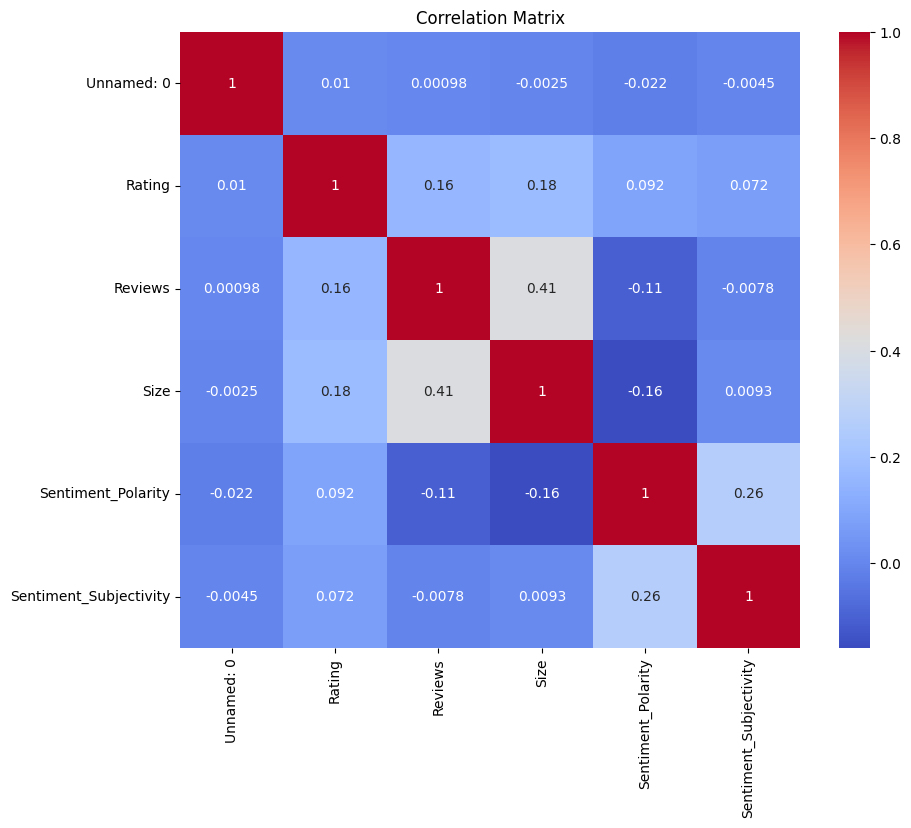

In [7]:
# EDA - Correlation Matrix
correlation_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


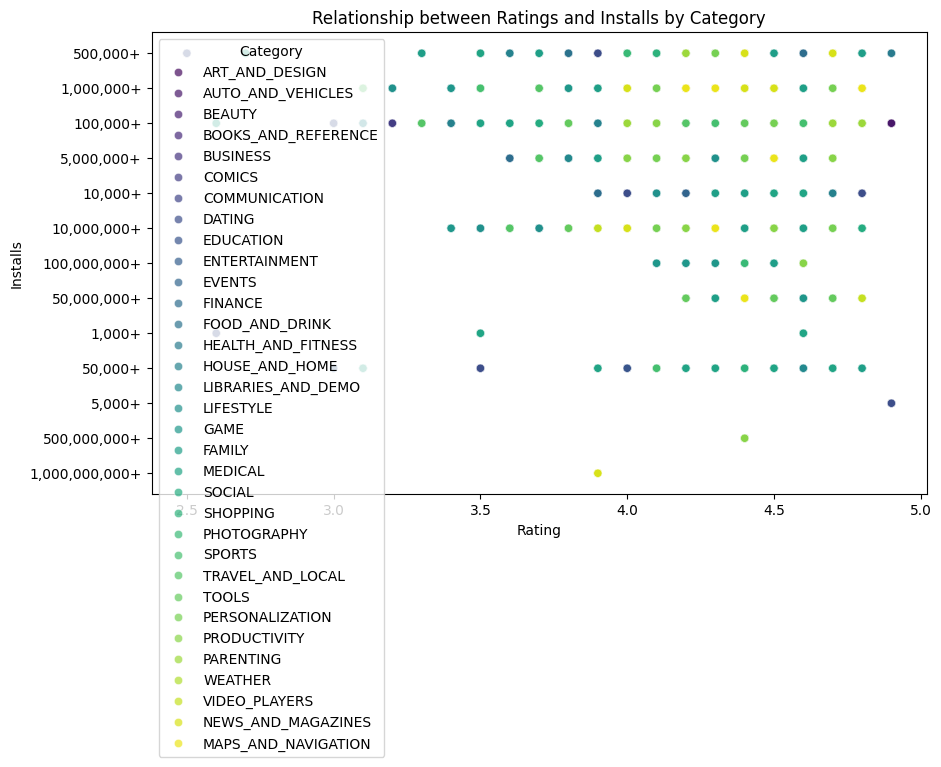

In [8]:
# Growth and Retention Strategies - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', data=merged_df, hue='Category', palette='viridis', alpha=0.7)
plt.title('Relationship between Ratings and Installs by Category')
plt.show()


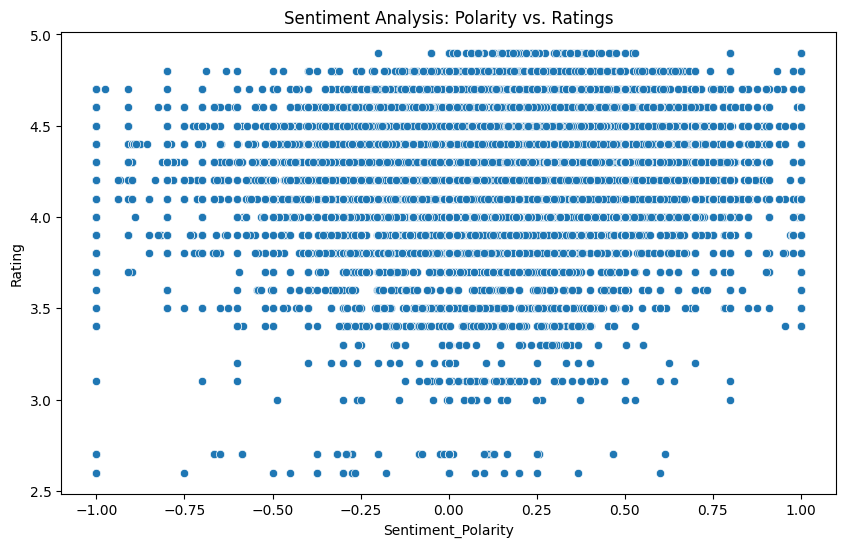

In [9]:
# Sentiment Analysis - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Rating', data=merged_df)
plt.title('Sentiment Analysis: Polarity vs. Ratings')
plt.show()


In [11]:
# Statistical Analysis
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(merged_df['Rating'], merged_df['Reviews'])
print(f'T-statistic: {t_stat}, p-value: {p_value}')


T-statistic: -53.62744092917587, p-value: 0.0
